In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')
df.sample(5)

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
69,0.245756,0.849638,0.0
67,0.744446,0.576614,0.0
96,0.952914,-0.419766,1.0
17,-0.237125,0.778760,0.0
61,0.207181,-0.097671,1.0


In [4]:
df.shape

(99, 3)

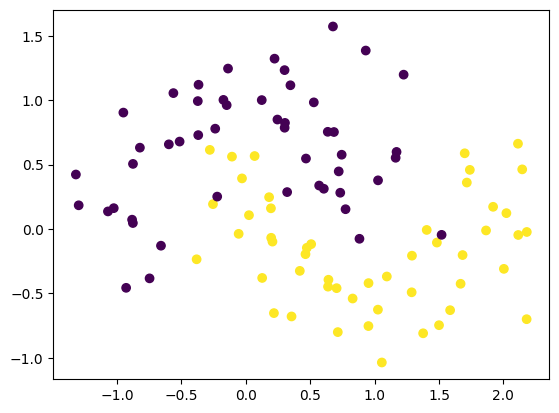

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

<Axes: >

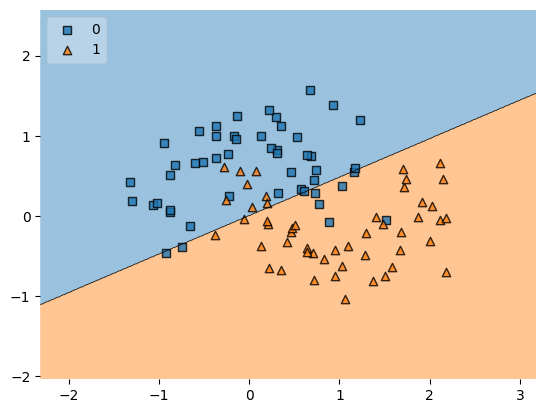

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype(int),lor,legend=2)

In [10]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lor,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

lor1 = LogisticRegression()
np.mean(cross_val_score(lor1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

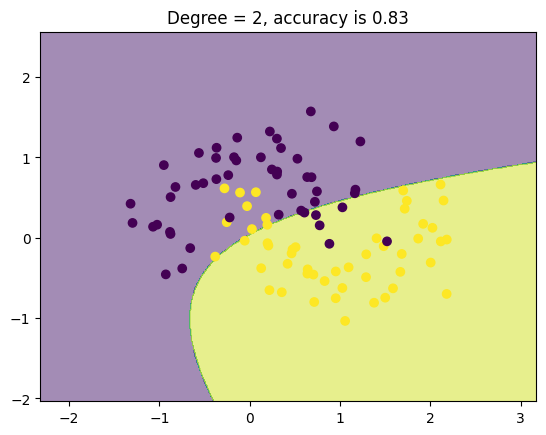

In [27]:
def plot_decision_boundary(X,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a = np.arange(start=X[:,0].min() - 1, stop=X[:,0].max() + 1,step=0.01)
    b = np.arange(start=X[:,1].min() - 1, stop=X[:,1].max() + 1,step=0.01)
    
    XX,YY = np.meshgrid(a,b)
    
    input_array = np.array([XX.ravel(),YY.ravel()]).T
    
    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title(f'Degree = {degree}, accuracy is {np.round(accuracy,2)}')
    
plot_decision_boundary(X,y,degree=2)

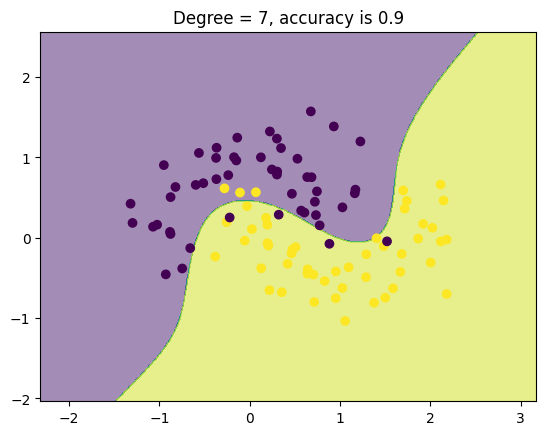

In [28]:
plot_decision_boundary(X,y,degree=7)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

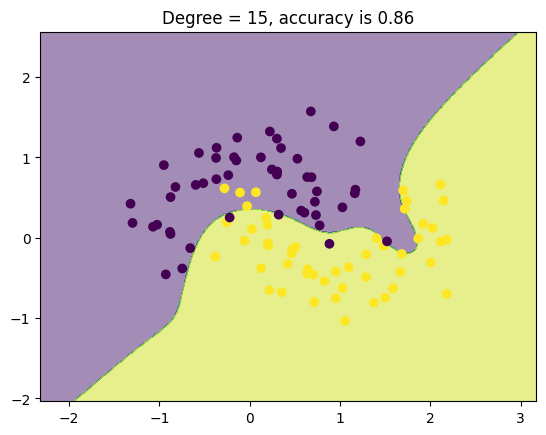

In [30]:
plot_decision_boundary(X,y,degree=15)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

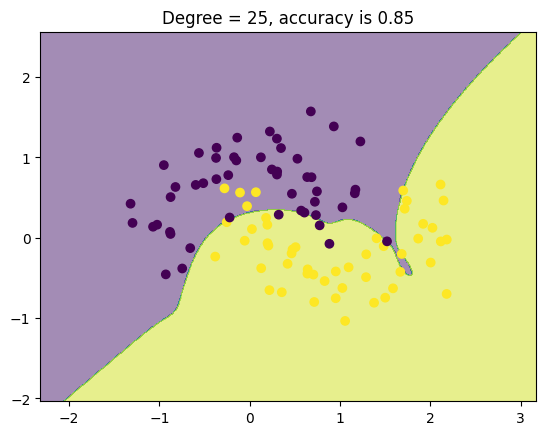

In [31]:
plot_decision_boundary(X,y,degree=25)